In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report,precision_score

In [ ]:
df  = pd.read_csv('/content/StudentPerformanceFactors.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

/tmp/ipython-input-3528035378.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
/tmp/ipython-input-3528035378.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


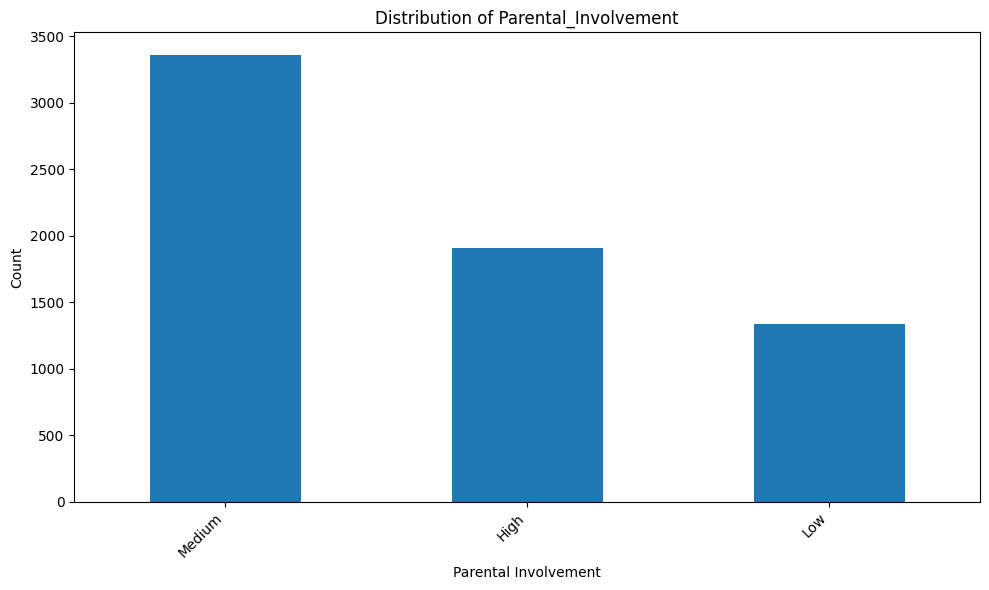

In [ ]:
# Parental_Involvement histogram
plt.figure(figsize=(10, 6))
df['Parental_Involvement'].value_counts().plot(kind='bar')
plt.title('Distribution of Parental_Involvement')
plt.xlabel('Parental Involvement')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

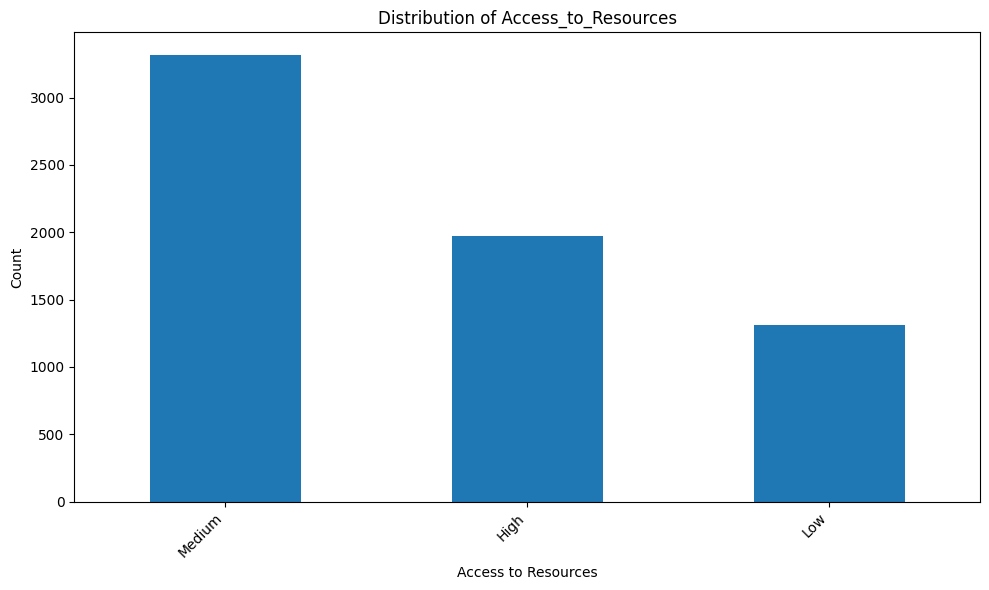

In [ ]:
# Access_to_Resources histogram
plt.figure(figsize=(10, 6))
df['Access_to_Resources'].value_counts().plot(kind='bar')
plt.title('Distribution of Access_to_Resources')
plt.xlabel('Access to Resources')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

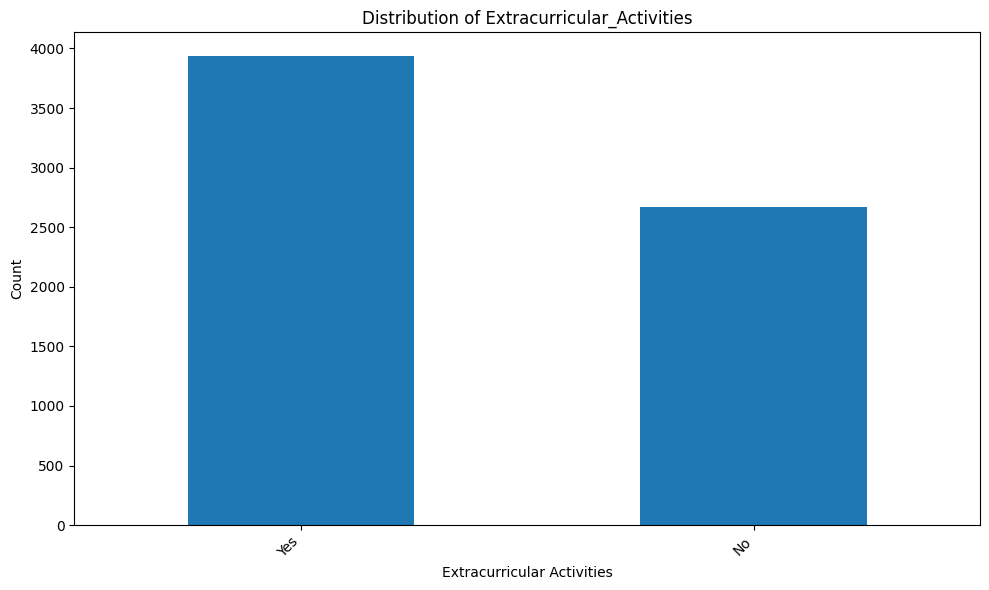

In [ ]:
# Extracurricular_Activities histogram
plt.figure(figsize=(10, 6))
df['Extracurricular_Activities'].value_counts().plot(kind='bar')
plt.title('Distribution of Extracurricular_Activities')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

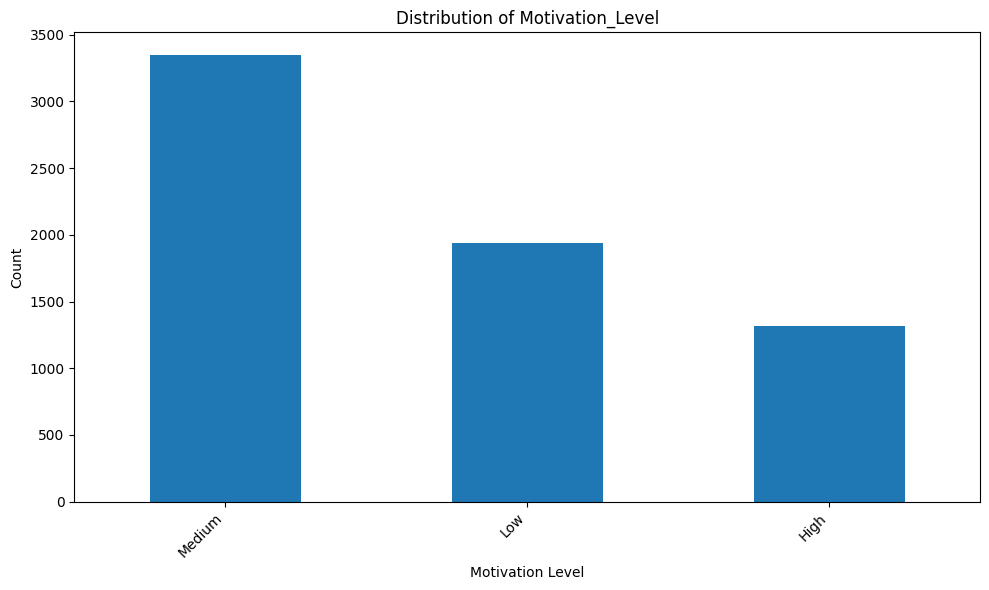

In [ ]:
# Motivation_Level histogram
plt.figure(figsize=(10, 6))
df['Motivation_Level'].value_counts().plot(kind='bar')
plt.title('Distribution of Motivation_Level')
plt.xlabel('Motivation Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

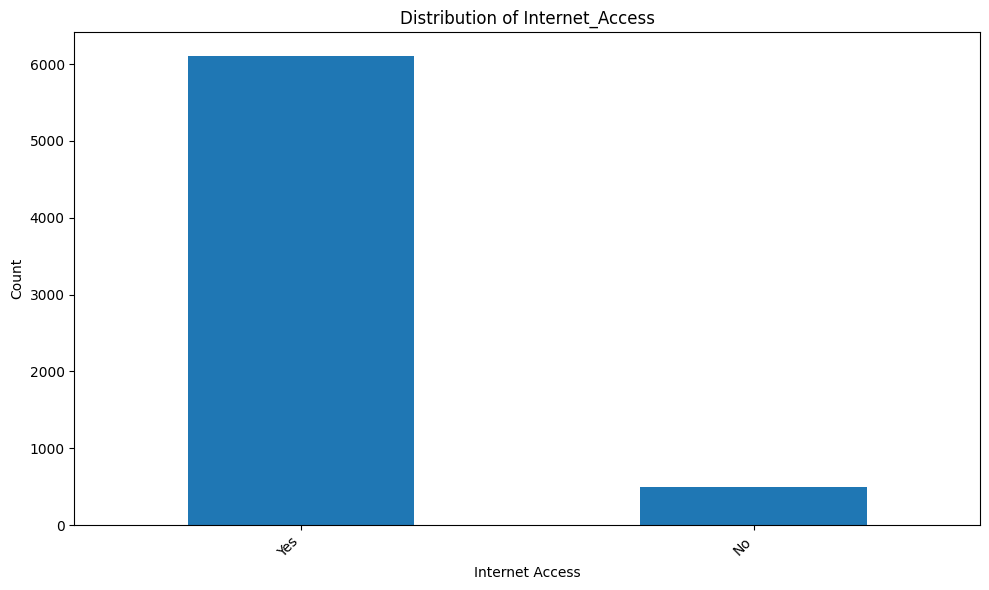

In [ ]:
# Internet_Access histogram
plt.figure(figsize=(10, 6))
df['Internet_Access'].value_counts().plot(kind='bar')
plt.title('Distribution of Internet_Access')
plt.xlabel('Internet Access')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

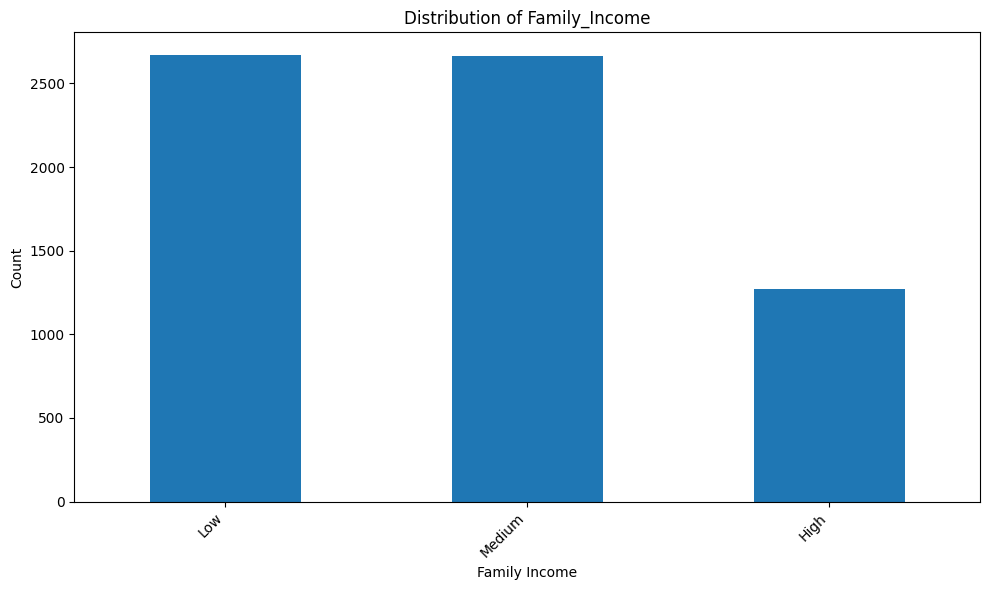

In [ ]:
# Family_Income histogram
plt.figure(figsize=(10, 6))
df['Family_Income'].value_counts().plot(kind='bar')
plt.title('Distribution of Family_Income')
plt.xlabel('Family Income')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

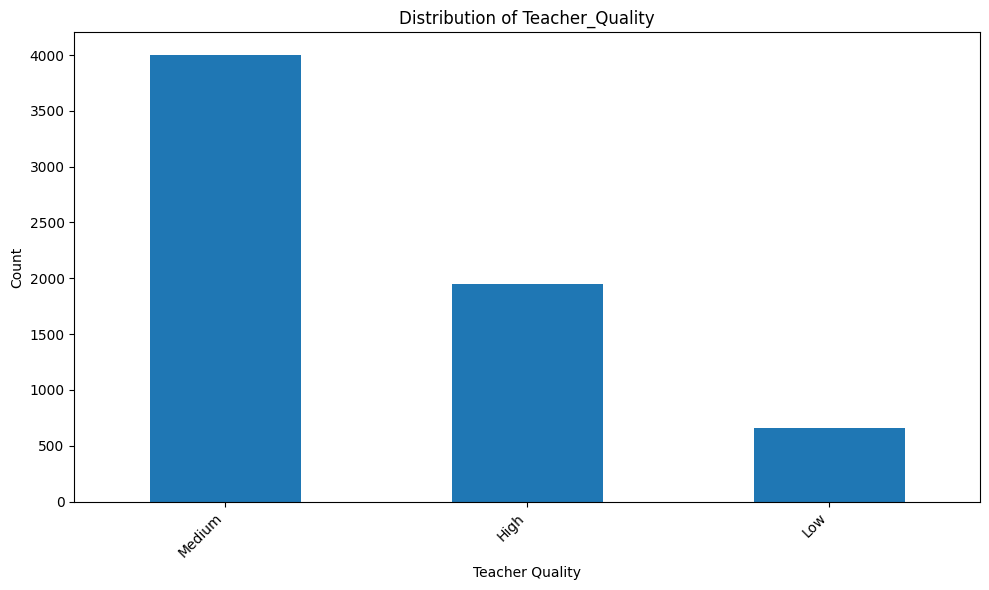

In [ ]:
# Teacher_Quality histogram
plt.figure(figsize=(10, 6))
df['Teacher_Quality'].value_counts().plot(kind='bar')
plt.title('Distribution of Teacher_Quality')
plt.xlabel('Teacher Quality')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

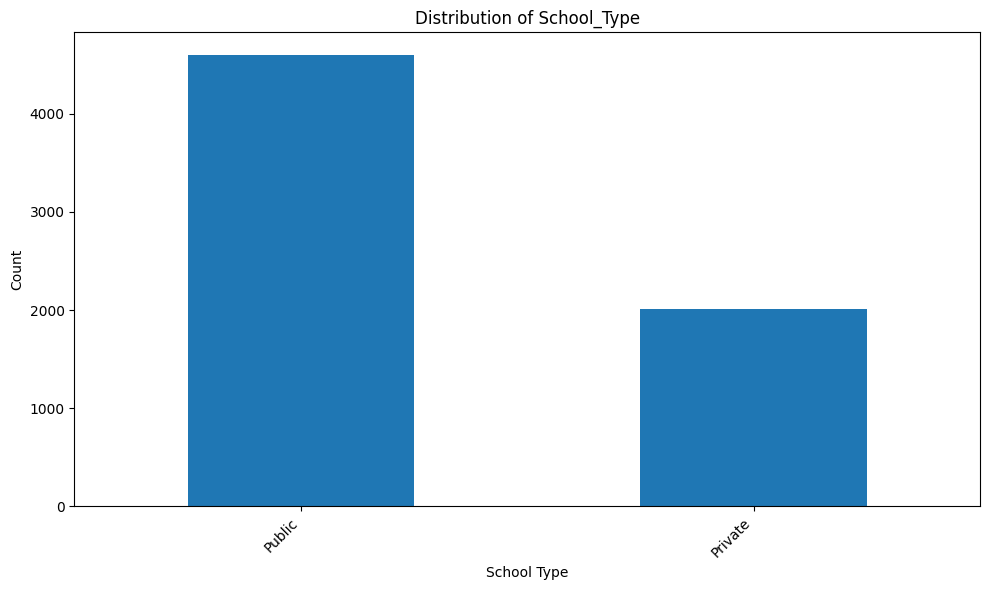

In [ ]:
# School_Type histogram
plt.figure(figsize=(10, 6))
df['School_Type'].value_counts().plot(kind='bar')
plt.title('Distribution of School_Type')
plt.xlabel('School Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

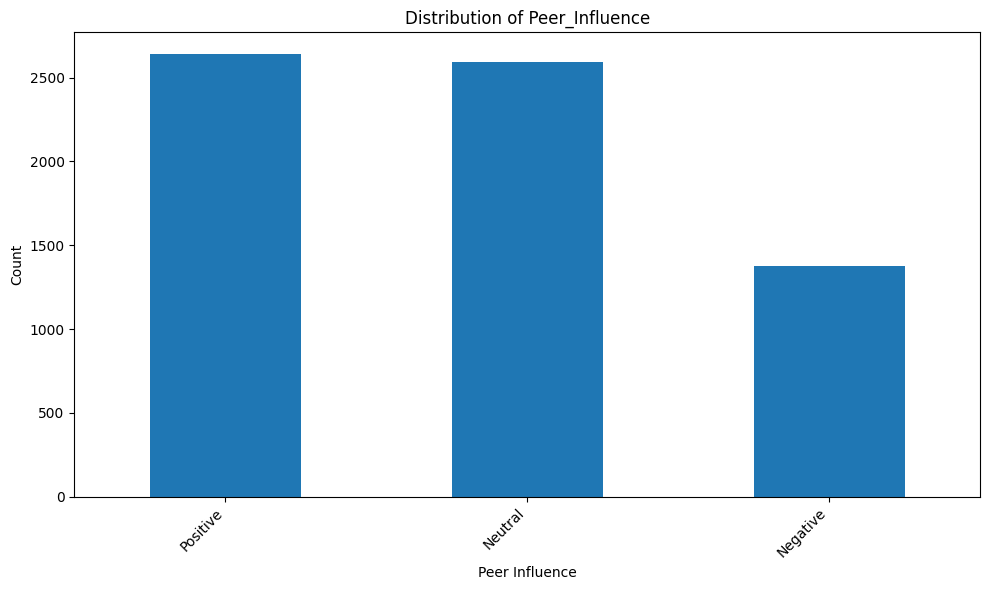

In [ ]:
# Peer_Influence histogram
plt.figure(figsize=(10, 6))
df['Peer_Influence'].value_counts().plot(kind='bar')
plt.title('Distribution of Peer_Influence')
plt.xlabel('Peer Influence')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

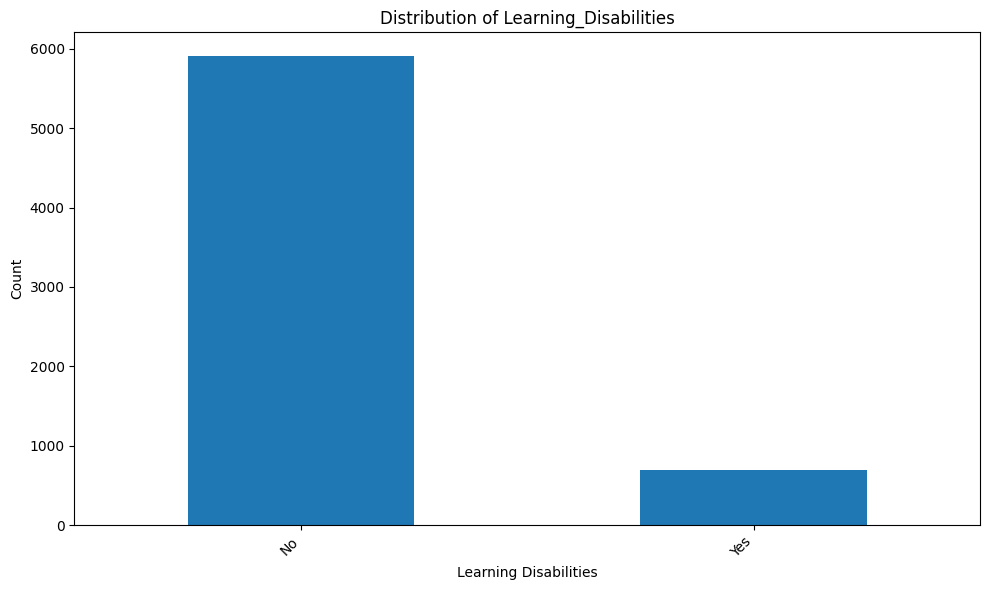

In [ ]:
# Learning_Disabilities histogram
plt.figure(figsize=(10, 6))
df['Learning_Disabilities'].value_counts().plot(kind='bar')
plt.title('Distribution of Learning_Disabilities')
plt.xlabel('Learning Disabilities')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

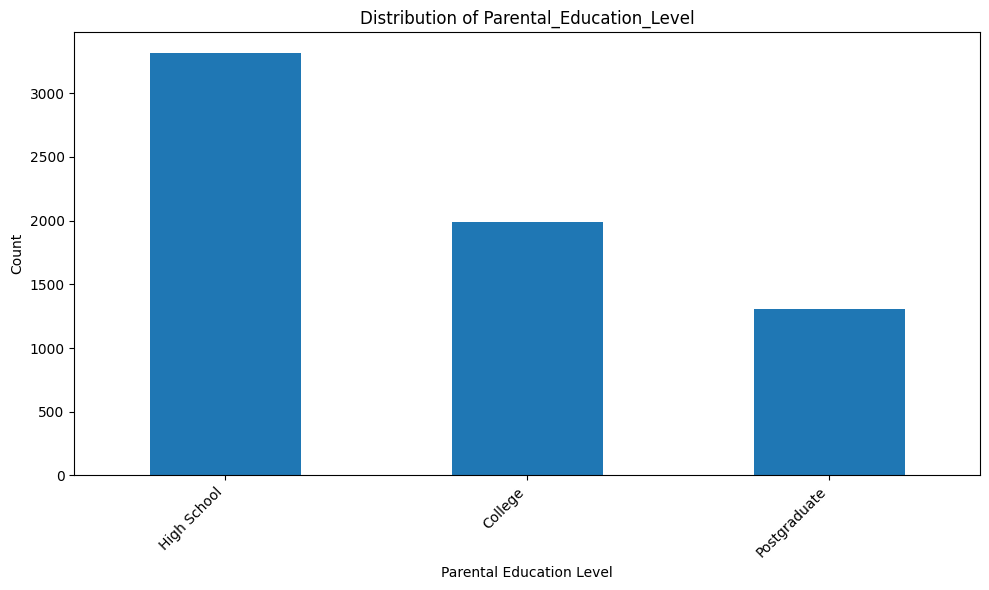

In [ ]:
# Parental_Education_Level histogram
plt.figure(figsize=(10, 6))
df['Parental_Education_Level'].value_counts().plot(kind='bar')
plt.title('Distribution of Parental_Education_Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

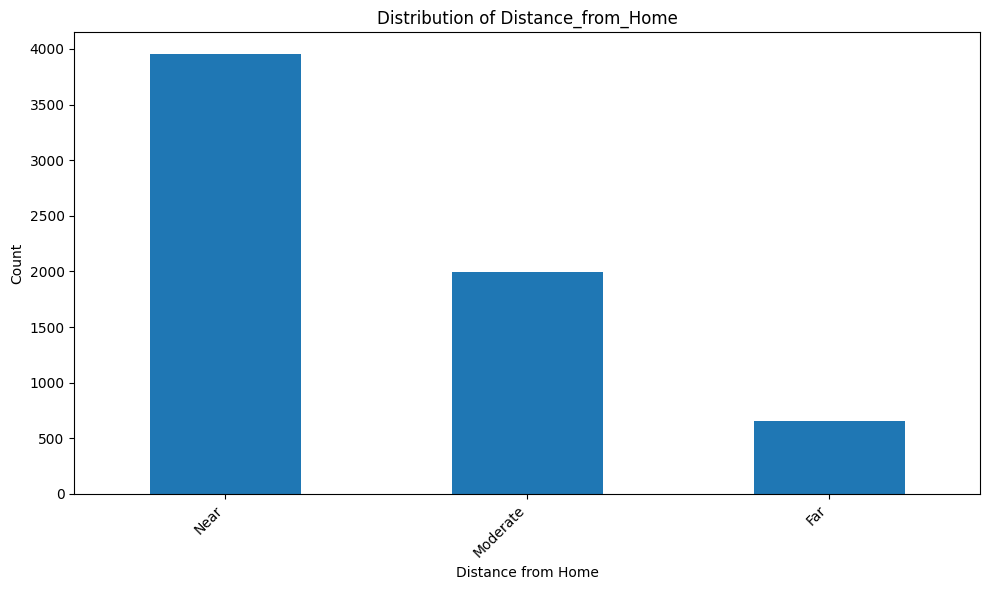

In [ ]:
# Distance_from_Home histogram
plt.figure(figsize=(10, 6))
df['Distance_from_Home'].value_counts().plot(kind='bar')
plt.title('Distribution of Distance_from_Home')
plt.xlabel('Distance from Home')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

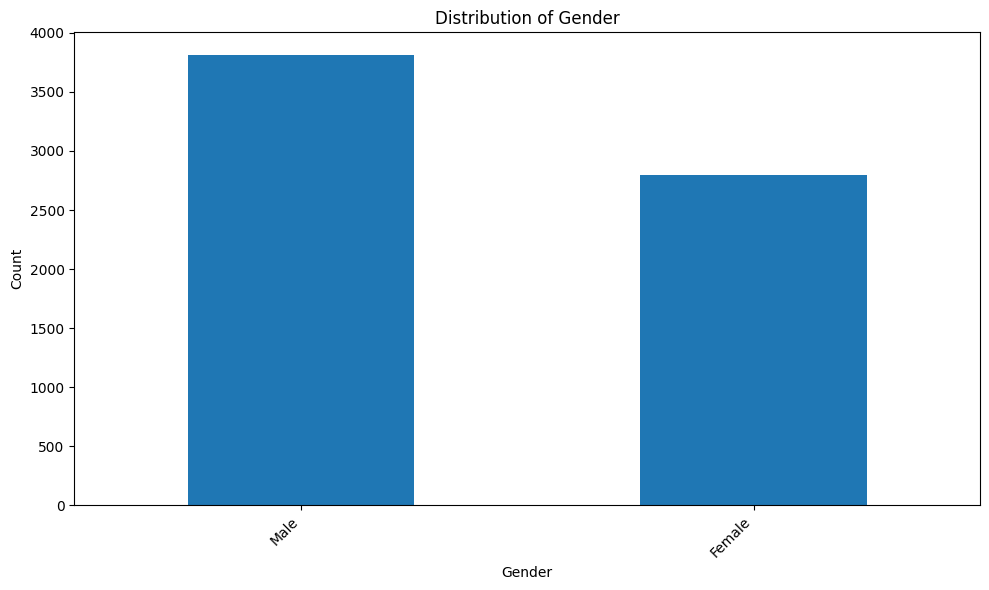

In [ ]:
# Gender histogram
plt.figure(figsize=(10, 6))
df['Gender'].value_counts().plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_raw = df.copy()

In [ ]:
df_original = df_raw.copy()

In [ ]:
OHE = OneHotEncoder(drop='first', sparse_output=False)
encoded = OHE.fit_transform(df_original.select_dtypes(include='object'))
encoded_df = pd.DataFrame(encoded, columns=OHE.get_feature_names_out(df_original.select_dtypes(include='object').columns))
df_original = pd.concat([df_original.drop(df_original.select_dtypes(include='object').columns, axis=1), encoded_df], axis=1)

In [ ]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Hours_Studied                          6607 non-null   int64  
 1   Attendance                             6607 non-null   int64  
 2   Sleep_Hours                            6607 non-null   int64  
 3   Previous_Scores                        6607 non-null   int64  
 4   Tutoring_Sessions                      6607 non-null   int64  
 5   Physical_Activity                      6607 non-null   int64  
 6   Exam_Score                             6607 non-null   int64  
 7   Parental_Involvement_Low               6607 non-null   float64
 8   Parental_Involvement_Medium            6607 non-null   float64
 9   Access_to_Resources_Low                6607 non-null   float64
 10  Access_to_Resources_Medium             6607 non-null   float64
 11  Extr

In [ ]:
df_original.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,...,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659,0.202361,0.508854,0.198729,...,0.605873,0.695929,0.392311,0.399273,0.105191,0.501438,0.197518,0.302407,0.598002,0.577267
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456,0.401790,0.499959,0.399074,...,0.488699,0.460048,0.488302,0.489786,0.306823,0.500036,0.398156,0.459335,0.490339,0.494031
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
fullx = df_original.drop('Exam_Score', axis=1)
y = df['Exam_Score']
scaler = StandardScaler()
fullX_scaled = scaler.fit_transform(fullx)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(fullX_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# building model
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
# testing model
ypred = model.predict(xtest)

In [ ]:
# checking accuracy
fullmse = mean_squared_error(ytest, ypred)
fullr2 = r2_score(ytest, ypred)
print("Mean Squared Error:", fullmse)
print("R-squared:", fullr2)

Mean Squared Error: 3.2560199870428943
R-squared: 0.7696495724907312


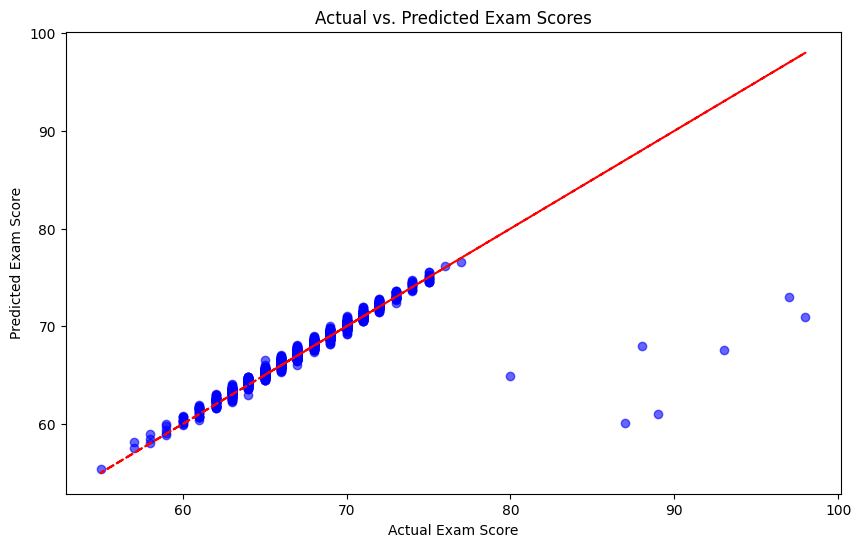

In [ ]:
# predicted vs. actual
plt.figure(figsize=(10, 6))
plt.scatter(ytest, ypred, alpha=0.6, color="blue", label="Predictions")
plt.plot(ytest, ytest, "--", color="red", label="Perfect Fit")
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.show()

In [ ]:
# full data with feature engineering
df_ffe = df_raw.copy()

In [ ]:
OHE = OneHotEncoder(drop='first', sparse_output=False)
encoded = OHE.fit_transform(df_ffe.select_dtypes(include='object'))
encoded_df = pd.DataFrame(encoded, columns=OHE.get_feature_names_out(df_ffe.select_dtypes(include='object').columns))
df_ffe = pd.concat([df_ffe.drop(df_ffe.select_dtypes(include='object').columns, axis=1), encoded_df], axis=1)

In [ ]:
df_ffe['Parental_Impact'] = (
    (df_ffe.get('Parental_Involvement_Medium', 0)*2 + df_ffe.get('Parental_Involvement_High', 0)*3 + (1 - (df_ffe.get('Parental_Involvement_Medium', 0) + df_ffe.get('Parental_Involvement_High', 0)))*1) * w1 +
    (df_ffe.get('Parental_Education_Level_College', 0)*2 + df_ffe.get('Parental_Education_Level_Postgraduate', 0)*3 + (1 - (df_ffe.get('Parental_Education_Level_College', 0) + df_ffe.get('Parental_Education_Level_Postgraduate', 0)))*1) * w2 +
    (df_ffe.get('Family_Income_Medium', 0)*2 + df_ffe.get('Family_Income_High', 0)*3 + (1 - (df_ffe.get('Family_Income_Medium', 0) + df_ffe.get('Family_Income_High', 0)))*1) * w3
)


NameError: name 'w1' is not defined

In [ ]:
ffex = df_ffe.drop('Exam_Score', axis=1)
ffey = df_ffe['Exam_Score']
ffeX_scaled = scaler.fit_transform(ffex)

In [ ]:
ffextrain, ffextest, ffeytrain, ffeytest = train_test_split(ffeX_scaled, ffey, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(ffextrain, ffeytrain)
ffeypred = model.predict(ffextest)

In [ ]:
ffemse = mean_squared_error(ffeytest, ffeypred)
ffer2 = r2_score(ffeytest, ffeypred)
print("Mean Squared Error:", ffemse)
print("R-squared:", ffer2)

Mean Squared Error: 3.2560199870428943
R-squared: 0.7696495724907312


In [ ]:
df_noparent = df_raw.drop(['Parental_Involvement','Family_Income','Parental_Education_Level'], axis=1)

In [ ]:
OHE = OneHotEncoder(drop='first', sparse_output=False)
encoded = OHE.fit_transform(df_noparent.select_dtypes(include='object'))
encoded_df = pd.DataFrame(encoded, columns=OHE.get_feature_names_out(df_noparent.select_dtypes(include='object').columns))
df_noparent = pd.concat([df_noparent.drop(df_noparent.select_dtypes(include='object').columns, axis=1), encoded_df], axis=1)

In [ ]:
# taking out parental intervention
noparentx = df_noparent.drop('Exam_Score', axis=1)
noparenty = df_noparent['Exam_Score']
noparentX_scaled = scaler.fit_transform(noparentx)

In [ ]:
npxtrain, npxtest, npytrain, npytest = train_test_split(noparentX_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# building a non parental intervention model.
noparentmodel = LinearRegression()
noparentmodel.fit(npxtrain, npytrain)

LinearRegression()

In [ ]:
# testing the model
noparentypred = noparentmodel.predict(npxtest)

In [ ]:
# checking accuracy
npmse = mean_squared_error(npytest, noparentypred)
npr2 = r2_score(npytest, noparentypred)
print("Mean Squared Error:", npmse)
print("R-squared:", npr2)

Mean Squared Error: 4.004777843918538
R-squared: 0.7166779405233024


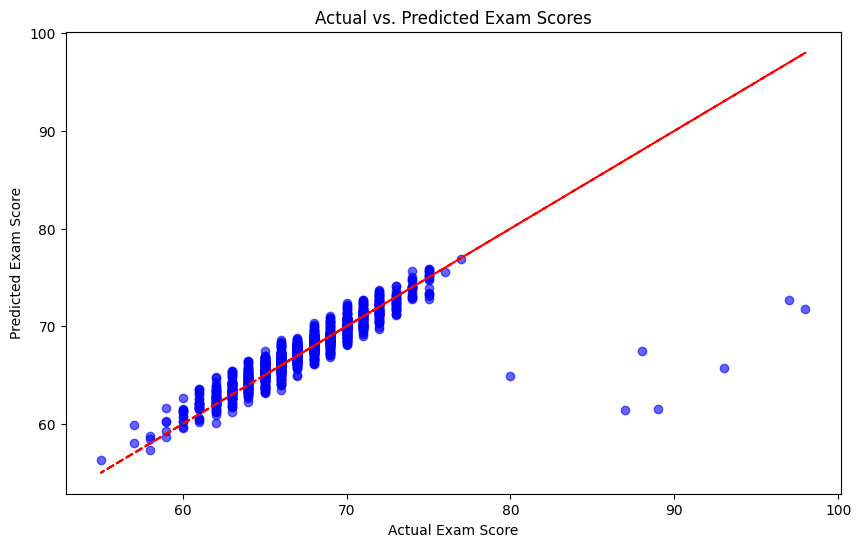

In [ ]:
# predicted vs actual.
plt.figure(figsize=(10, 6))
plt.scatter(npytest, noparentypred, alpha=0.6, color="blue", label="Predictions")
plt.plot(npytest, npytest, "--", color="red", label="Perfect Fit")
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.show()

In [ ]:
df_gpm = df_raw.drop(['Gender','Physical_Activity','Motivation_Level'], axis=1)

In [ ]:
OHE = OneHotEncoder(drop='first', sparse_output=False)
encoded = OHE.fit_transform(df_gpm.select_dtypes(include='object'))
encoded_df = pd.DataFrame(encoded, columns=OHE.get_feature_names_out(df_gpm.select_dtypes(include='object').columns))
df_gpm = pd.concat([df_gpm.drop(df_gpm.select_dtypes(include='object').columns, axis=1), encoded_df], axis=1)

In [ ]:
# taking out gender, physical activity and motivation level
nogenderx = df_gpm.drop('Exam_Score', axis=1)
nogendery = df_gpm['Exam_Score']
ngx = scaler.fit_transform(nogenderx)

In [ ]:
ngxtrain, ngxtest, ngytrain, ngytest = train_test_split(ngx, nogendery, test_size=0.2, random_state=42)

In [ ]:
# building model
nogpmmodel = LinearRegression()
nogpmmodel.fit(ngxtrain, ngytrain)

LinearRegression()

In [ ]:
# testing model
nogpmpred = nogpmmodel.predict(ngxtest)

In [ ]:
# checking accuracy
gpmmse = mean_squared_error(ngytest, nogpmpred)
gpmr2 = r2_score(ngytest, nogpmpred)
print("Mean Squared Error:", gpmmse)
print("R-squared:", gpmr2)

Mean Squared Error: 3.4491615408008296
R-squared: 0.7559855779037843


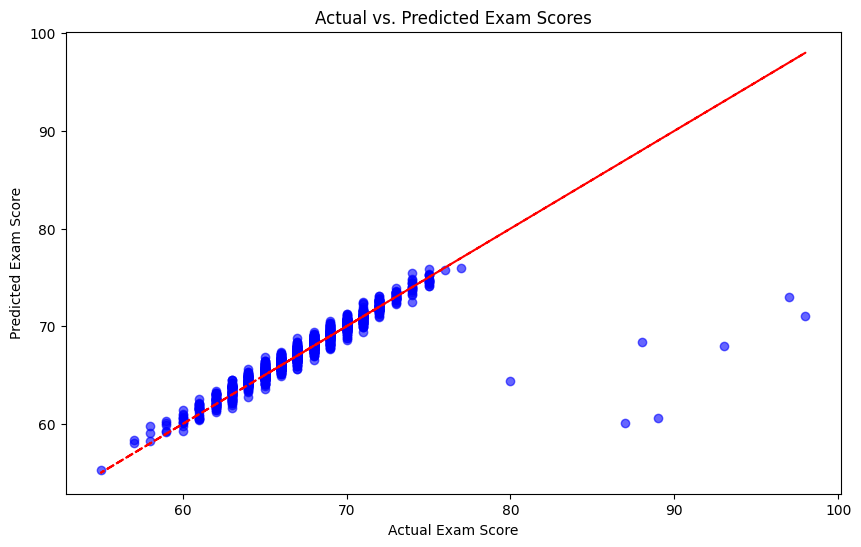

In [ ]:
# predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(ngytest, nogpmpred, alpha=0.6, color="blue", label="Predictions")
plt.plot(ngytest, ngytest, "--", color="red", label="Perfect Fit")
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.show()

In [ ]:
df_teach = df_raw.drop(['Teacher_Quality','Peer_Influence','Tutoring_Sessions','Gender'], axis=1)

In [ ]:
OHE = OneHotEncoder(drop='first', sparse_output=False)
encoded = OHE.fit_transform(df_teach.select_dtypes(include='object'))
encoded_df = pd.DataFrame(encoded, columns=OHE.get_feature_names_out(df_teach.select_dtypes(include='object').columns))
df_teach = pd.concat([df_teach.drop(df_teach.select_dtypes(include='object').columns, axis=1), encoded_df], axis=1)

In [ ]:
# new model without teacher intervening.
noteacherx = df_teach.drop('Exam_Score', axis=1)
noteachey = df_teach['Exam_Score']
noteacherx_scaled = scaler.fit_transform(noteacherx)

In [ ]:
ntxtrain, ntxtest, ntytrain, ntytest = train_test_split(noteacherx_scaled, noteachey, test_size=0.2, random_state=42)

In [ ]:
# building and testing model
noteachermodel = LinearRegression()
noteachermodel.fit(ntxtrain, ntytrain)
noteacherypred = noteachermodel.predict(ntxtest)

In [ ]:
# checking model
ntmse = mean_squared_error(ntytest, noteacherypred)
ntr2 = r2_score(ntytest, noteacherypred)
print("Mean Squared Error:", ntmse)
print("R-squared:", ntr2)

Mean Squared Error: 3.816420367029067
R-squared: 0.7300034807530054


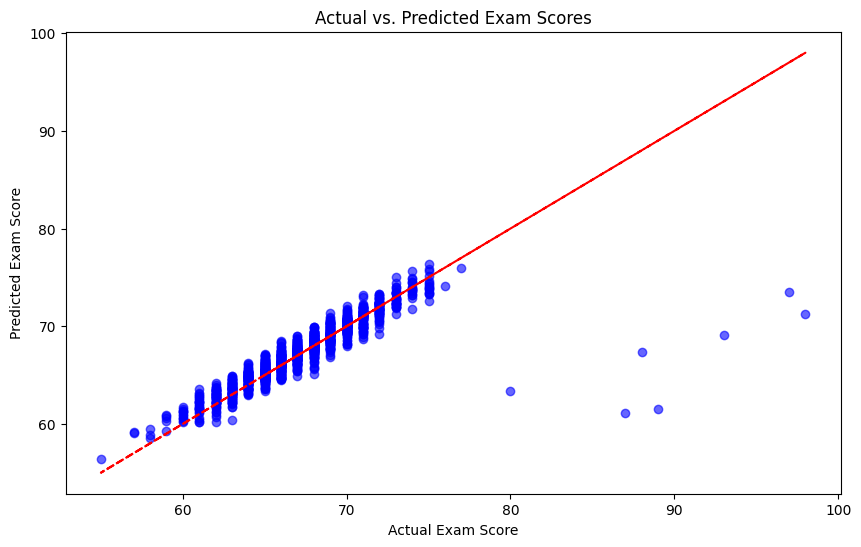

In [ ]:
#  no teacher plotting
plt.figure(figsize=(10, 6))
plt.scatter(ntytest, noteacherypred, alpha=0.6, color="blue", label="Predictions")
plt.plot(ntytest, ntytest, "--", color="red", label="Perfect Fit")
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.show()

In [ ]:
df_new = df_raw[['Attendance','Hours_Studied','Sleep_Hours','Previous_Scores','Learning_Disabilities','Tutoring_Sessions','Physical_Activity','Extracurricular_Activities','Extracurricular_Activities','Exam_Score']]

In [ ]:
OHE = OneHotEncoder(drop='first', sparse_output=False)
encoded = OHE.fit_transform(df_new.select_dtypes(include='object'))
encoded_df = pd.DataFrame(encoded, columns=OHE.get_feature_names_out(df_new.select_dtypes(include='object').columns))
df_new = pd.concat([df_new.drop(df_new.select_dtypes(include='object').columns, axis=1), encoded_df], axis=1)

In [ ]:
# building a model with student dilligence
newx = df_new.drop('Exam_Score', axis=1)
newy = df_new['Exam_Score']
newx_scaled = scaler.fit_transform(newx)

In [ ]:
newxtrain, newxtest, newytrain, newytest = train_test_split(newx_scaled, newy, test_size=0.2, random_state=42)

In [ ]:
# building and testing
newmodel = LinearRegression()
newmodel.fit(newxtrain, newytrain)
newypred = newmodel.predict(newxtest)

In [ ]:
# checking model accuracy
newmse = mean_squared_error(newytest, newypred)
newr2 = r2_score(newytest, newypred)
print("Mean Squared Error:", newmse)
print("R-squared:", newr2)

Mean Squared Error: 4.994091706474984
R-squared: 0.6466879306070269


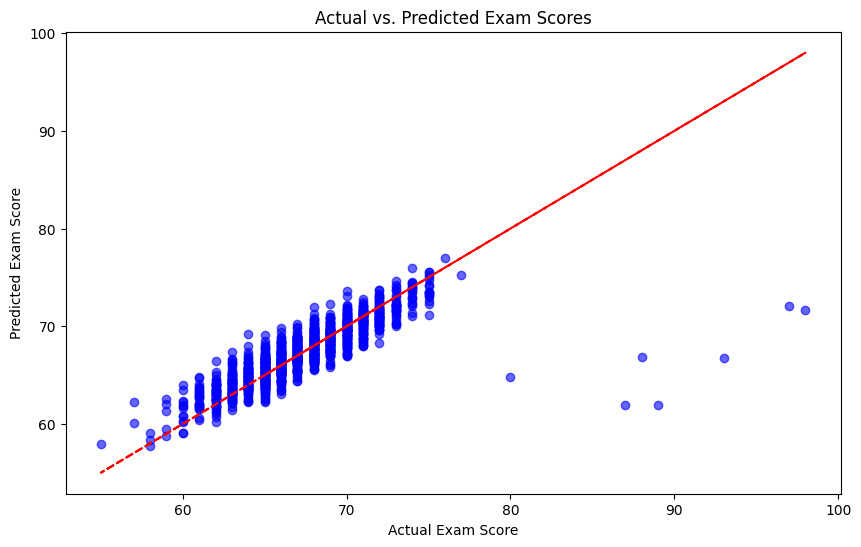

In [ ]:
# plotting student dilligence
plt.figure(figsize=(10, 6))
plt.scatter(newytest, newypred, alpha=0.6, color="blue", label="Predictions")
plt.plot(newytest, newytest, "--", color="red", label="Perfect Fit")
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.show()

Since **FULL** data is the highest accuracy it will be used to *compare* between polynomial and linear regression

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False,interaction_only=True)
X_poly = poly.fit_transform(fullX_scaled)

In [ ]:
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [ ]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_poly)

LinearRegression()

In [ ]:
y_pred_poly = poly_model.predict(X_test_poly)

In [ ]:
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
r2_poly = r2_score(y_test_poly, y_pred_poly)
accuracy_poly = poly_model.score(X_test_poly, y_test_poly)
print("Mean Squared Error:", mse_poly)
print("R-squared:", r2_poly)

Mean Squared Error: 3.5654229500939243
R-squared: 0.7477605469027258


In [ ]:
compare_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'Mean Squared Error': [fullmse, mse_poly],
    'R-squared': [fullr2, r2_poly]
})
compare_df

,Model,Mean Squared Error,R-squared
0,Linear Regression,3.256020,0.769650
1,Polynomial Regression,3.565423,0.747761


# The Linear Rgression model preformed better than the Polynomial Regression model, with a **2.2%** more accuracy in *linear regression* than in the *polynomial regression*


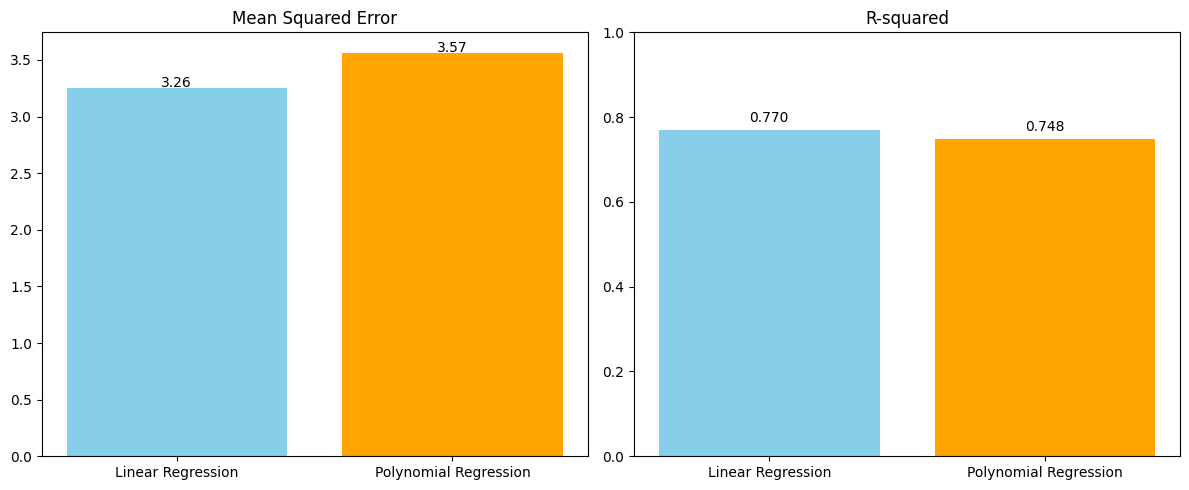

In [ ]:
# Comparison visualization
plt.figure(figsize=(12, 5))

# MSE comparison
plt.subplot(1, 2, 1)
plt.bar(compare_df['Model'], compare_df['Mean Squared Error'], color=['skyblue', 'orange'])
plt.title('Mean Squared Error')
for i, v in enumerate(compare_df['Mean Squared Error']):
    plt.text(i, v + (v * 0.0005 if v != 0 else 0.01), f"{v:.2f}", ha='center')

#R² comparison
plt.subplot(1, 2, 2)
plt.bar(compare_df['Model'], compare_df['R-squared'], color=['skyblue', 'orange'])
plt.title('R-squared')
plt.ylim(0, 1)
for i, v in enumerate(compare_df['R-squared']):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.show()

In [ ]:
print("Model Performance Metrics:")
print("-" * 30)
print(f"Original Linear Regression (One-Hot Encoding):")
print(f"  Mean Squared Error: {fullmse:.4f}")
print(f"  R-squared: {fullr2:.4f}")
print("-" * 30)
print(f"Linear Regression (Target Encoding):")
print(f"  Mean Squared Error: {temse:.4f}")
print(f"  R-squared: {ter2:.4f}")
print("-" * 30)
print(f"Linear Regression (with Interaction Terms):")
print(f"  Mean Squared Error: {imse:.4f}")
print(f"  R-squared: {ir2:.4f}")
print("-" * 30)
# Assuming you also want to see the polynomial regression results again
print(f"Polynomial Regression:")
print(f"  Mean Squared Error: {mse_poly:.4f}")
print(f"  R-squared: {r2_poly:.4f}")